# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [18]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("./lfw/*/*"))
dog_files = np.array(glob("./dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


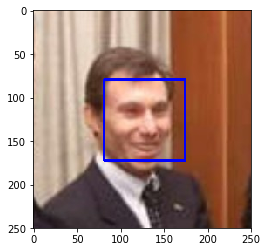

In [19]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [15]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 18% of dog files showed human faces. 99% of human files showed human faces.

In [20]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

human_human_count = 0 
for human in human_files_short:
    count_human = face_detector(human)
    human_human_count = human_human_count + count_human

dog_human_count = 0 
for dog in dog_files_short:
    count_dog = face_detector(dog)
    dog_human_count = dog_human_count + count_dog

print(dog_human_count)
print(human_human_count)
#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.


18
99


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [13]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [9]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms
import torch
import torchvision.models as models

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def tform(input):
    img = Image.open(input)
    
    data_transforms = transforms.Compose([
            transforms.CenterCrop(250),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    ])
    img_tensor = data_transforms(img)
    img_tensor.unsqueeze_(0)
    return img_tensor

def VGG16_predict(img_path):
    tensor_in = tform(img_path)
    classification = VGG16(tensor_in)
    return classification
    
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [4]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
        sample = VGG16_predict(img_path)
        maximum, indx = torch.max(sample,1)
        result = indx[0].item()
        if 150 < result < 269:
            return True
        else: 
            return False
            
    ## TODO: Complete the function.
    
    #return None # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [10]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
dog_count = 0
for dog in dog_files_short:
    result = dog_detector(dog)
    if result == True:
        dog_count = dog_count + 1
print("Total Dogs in Short Dog Files = ", dog_count, "/100" )

human_dog_count = 0
for human in human_files_short:
    result = dog_detector(human)
    if result == True:
        human_dog_count = human_dog_count + 1
print("Total Dogs in Short Human Files = ", human_dog_count, "/100" )
        

Total Dogs in Short Dog Files =  96 /100
Total Dogs in Short Human Files =  0 /100


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [9]:
import os
from torchvision import datasets
import torchvision.transforms as transforms
from PIL import Image
import torch

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 15
# percentage of training set to use as validation
valid_size = 0.2

# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
    ])
transform_train = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomRotation(45),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
    ])

dog_files_train = datasets.ImageFolder("./dogImages/train/", transform=transform_train)
dog_files_test = datasets.ImageFolder("./dogImages/test/", transform=transform)
dog_files_valid = datasets.ImageFolder("./dogImages/valid/", transform=transform)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(dog_files_train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dog_files_test, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(dog_files_valid, batch_size=batch_size, shuffle=True)


loaders_scratch = {'train': train_loader, 'test': test_loader, 'valid': valid_loader}

In [13]:
for batch_idx, loader_content in enumerate(loaders_scratch['train']):
  print(loader_content[1])
  if batch_idx > 10:
    break
#Checking data loader to see if it is functioning properly.  
#This cell should output 10 examples of data loaders. 
#Each tensor should a number of elements equal to the batch size. 
#Each element should have a value between 0 and 133 (# of dog breeds)

tensor([ 30,  26,  17,  69, 114,  45, 132, 102,  62,  92,  89,  27,   3, 106,
         13])
tensor([ 20,  72, 110,   4,  45,  82,  41,  59,   2,  60,  68,  18,  79,  49,
         18])
tensor([ 89,  70,  31,  56,  97,  57,  64, 122,  86,  16,  25, 112,  44,  29,
         55])
tensor([  3,  25,  71,  55,  61, 110,  58,   1,  54, 123,   3,  14,  98,  58,
          2])
tensor([ 55,  33, 128,  70,   9,  24, 132,  78, 111,  88,  64,  86,  76,  61,
        100])
tensor([ 86,  33,  57,   0,  29, 123,  56,  89, 131,   8, 110, 121,  53,  13,
          2])
tensor([ 15, 112,  35,  47,  28,  33, 121,  13, 113,   6,  81,   9,  95,  82,
         84])
tensor([ 49,  93,  94,  50, 111,  94,  47,   2,  49,  68, 112, 116,  60,  98,
         93])
tensor([ 81,  55,  88,  60, 106,  77,  53,   1,  93, 114,   0,  93,  26,   1,
         43])
tensor([ 54, 117,  81, 117,  35,  67,  35,  13,  47,  46,  89,  46,  17,  56,
          3])
tensor([113,  41,   4, 130,  40,  58, 109, 106,  89,  44,  83, 132, 110, 105,
  

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: 

**Resizing:** I resized the images to 256x256 squares then cropped 224 pixel images. I also normalized the values.

- Resizing: The images are of varying sizes. Resizing will downsample the image to fit the desired dimensions. This is important because randomly cropping before doing this could introduce images that do not even contain parts of the dog, depending on the image size. Resizing before cropping reduces this likelyhood. 
- Crop: I took a 224 square crop from the resized images. The choice of 224 is arbitrary as any pixel size could be used. I picked this value because it makes the arithmetic necessary for determining neural network layer sizes easier. It is also the size used by VGG, and I wanted to be able to use the same transforms when starting from scratch or from transfer learning.
- Normalization: I normalized the values using means and standard deviation values I obtained from VGG's input transforms. The normalization is important because normalized inputs allow gradient descent to provide better weight updates during training. I disliked using these particular "magic numbers" for mean and standard deviation values but opted to stick with these values it would aid the comparison of my original and transfer learning models\.                                                                            

**Data Augmentation:** I chose to add many augmentation strategies to improve my network. Adding variance to the training data made the training more robust.

- Random Rotation: I rotated the images in the training set to introduce more variance into the training data.
- Random Resized Crop: I cropped the images randomly in the training set, but consistently chose centre crops in the validation and test sets. 
- Random Horizontal Flip: I introduced a random horizontal flip into the training set to add more variance to the training data. 

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
use_cuda = torch.cuda.is_available()

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1_1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2_1 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bnorm64_1 = nn.BatchNorm2d(64)
        self.bnorm64_2 = nn.BatchNorm2d(64)


        self.conv1_2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv2_2 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bnorm128_1 = nn.BatchNorm2d(128)
        self.bnorm128_2 = nn.BatchNorm2d(128)


        
        self.conv1_3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv2_3 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv3_3 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bnorm256_1 = nn.BatchNorm2d(256)
        self.bnorm256_2 = nn.BatchNorm2d(256)
        self.bnorm256_3 = nn.BatchNorm2d(256)


        
        self.conv1_4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.conv2_4 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv3_4 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bnorm512_1 = nn.BatchNorm2d(512)
        self.bnorm512_2 = nn.BatchNorm2d(512)
        self.bnorm512_3 = nn.BatchNorm2d(512)

       
        self.pool = nn.MaxPool2d(2,2)
        
        self.fc1 = nn.Linear(14*14*512, 2000)
        self.fc2 = nn.Linear(2000,500)
        self.fc3 = nn.Linear(500, 133)
        
        self.dropout = nn.Dropout(0.2)
        self.relu = nn.ReLU(inplace = True)
            
    def forward(self, x):
        
        x = self.relu(self.bnorm64_1(self.conv1_1(x)))
        x = self.relu(self.bnorm64_2(self.conv2_1(x)))
        x = self.pool(x)
        
        x = self.relu(self.bnorm128_1(self.conv1_2(x)))
        x = self.relu(self.bnorm128_2(self.conv2_2(x)))
        x = self.pool(x)
        
        x = self.relu(self.bnorm256_1(self.conv1_3(x)))
        x = self.relu(self.bnorm256_2(self.conv2_3(x)))
        x = self.relu(self.bnorm256_3(self.conv3_3(x)))
        x = self.pool(x)
        
        x = self.relu(self.bnorm512_1(self.conv1_4(x)))
        x = self.relu(self.bnorm512_2(self.conv2_4(x)))
        x = self.relu(self.bnorm512_3(self.conv3_4(x)))
        x = self.pool(x)
        
        x = x.view(x.size(0),-1)
        
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))

        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
model_scratch.load_state_dict(torch.load('model_scratch_final.pt'))
#I trained in multiple sessions (10 epochs, then 20 epochs).
#I used this modification to load the model the first round of training. 


# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

I fiddled with this model in a lot of different configurations that failed before choosing this one. At first I did not use a consistent kernel size or max pooling reduction. I had troubles training and did not pass 1% accuracy inspite of training for many epochs. To fix these issues I decided to copy the VGG archiecture, and introduce batch normalization.

__VGG Architecture:__ This model featured a consistent kernel size of 3x3 and max pooling reduction by half. It also featured at least 2, and in layer layers 3 convolutional layers before featuring a max pooling layer. I first initialized the model with 2 layers before each pooling layer, and found I was not making full use of GPU memory. I added a 3rd convolutional layer to the 3rd and 4th segments of my model to capitalize on this free resource. This was consistent with VGG, as they also featured additional convultional layers later in their model. Following this consistent structure helped improve my training process, but was not enough to pass the threshold 10%.

__Batch Normalization:__ Introducing this helped my model immensely. Batch normalization normalizes inputs to produce 0 mean and unit standard deviation. Normalizing the inputs to each layer improves the weight updates because it reduces the effect of input magnitude on any downstream weights that need to be changed. Introducing batch normalization helped me to eventually acheive 25% test accuracy.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [15]:
import torch.optim as optim

model_scratch = Net()
### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr = 0.001, momentum = 0.8)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [5]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            model.train()    
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * data.size(0)
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            model.eval()
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            output = model(data)
            loss = criterion(output, target)
            valid_loss += loss.item() * data.size(0)

        train_loss = train_loss / len(loaders['train'].dataset)
        valid_loss = valid_loss / len(loaders['valid'].dataset)
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).    Saving model...'.
            format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            #Writes successful training results to a file "results.txt"
            f = open("results.txt", "a+")
            f.write('Epoch: ' + repr(epoch) + '\n')
            f.write('Training Loss: ' + repr(train_loss) + '\n')
            f.write('Validation Loss: ' + repr(valid_loss) + '\n')
            f.close()
 
    return model

In [6]:

#model_scratch.load_state_dict(torch.load('model_scratch.pt'))
# train the model
model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')
#Note, for full training see. "results_final.txt"
# load the model that got the best validation accuracy
#model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.185896 	Validation Loss: 4.093048
Validation loss decreased (inf --> 4.093048).    Saving model...
Epoch: 2 	Training Loss: 4.105883 	Validation Loss: 3.837003
Validation loss decreased (4.093048 --> 3.837003).    Saving model...
Epoch: 3 	Training Loss: 4.063964 	Validation Loss: 3.845571
Epoch: 4 	Training Loss: 4.019730 	Validation Loss: 4.079516
Epoch: 5 	Training Loss: 3.950559 	Validation Loss: 3.795361
Validation loss decreased (3.837003 --> 3.795361).    Saving model...
Epoch: 6 	Training Loss: 3.910095 	Validation Loss: 3.654319
Validation loss decreased (3.795361 --> 3.654319).    Saving model...
Epoch: 7 	Training Loss: 3.857255 	Validation Loss: 3.718832
Epoch: 8 	Training Loss: 3.786776 	Validation Loss: 3.548927
Validation loss decreased (3.654319 --> 3.548927).    Saving model...
Epoch: 9 	Training Loss: 3.743989 	Validation Loss: 3.622974
Epoch: 10 	Training Loss: 3.661899 	Validation Loss: 3.445695
Validation loss decreased (3.548927 --> 3.44

I actually trained this model 30 times in total. The results can be found in "results_final.txt". This printout is for the 11th through 30th training. 

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [23]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
def test(loaders, model, criterion, use_cuda):

    # test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.965202


Test Accuracy: 25% (209/836)

---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [10]:
## TODO: Specify data loaders
#I used the same data loaders for the pre-trained model and the model from scratch. 
loaders_transfer = loaders_scratch

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [3]:
import torchvision.models as models
import torch.nn as nn
import torch

## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True)

for param in model_transfer.features.parameters():
    param.required_grad = False
    
n_inputs = model_transfer.classifier[6].in_features
last = nn.Linear(n_inputs, 133)

model_transfer.classifier[6] = last

print(model_transfer)
use_cuda = torch.cuda.is_available()
if use_cuda:
    model_transfer = model_transfer.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ I copied the VGG networks architecture exactly and used their weights for almost every layer. The only layer I changed was the final layer, which performs classification. Here I shrunk the outputs to 133. The convolutional layer and max pooling layer combination is suitable because it allows for feature extraction follow by compression. The ReLU activation function provides thresholding and scales the outputs. 
Finally the fully connected portion of the model translates the features extracted into class scores.
Using this architecture allows me to take advantage of the feature extraction powers of VGG, and apply these features to my classification task.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [12]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr = 0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [ ]:
# train the model
model_transfer.load_state_dict(torch.load('model_transfer.pt'))
model_transfer = train(8, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')
#I trained in 2 sessions for 10 total epochs. 

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 1.420932 	Validation Loss: 0.586367
Validation loss decreased (inf --> 0.586367).    Saving model...
Epoch: 2 	Training Loss: 1.305702 	Validation Loss: 0.577651
Validation loss decreased (0.586367 --> 0.577651).    Saving model...
Epoch: 3 	Training Loss: 1.303706 	Validation Loss: 0.515657
Validation loss decreased (0.577651 --> 0.515657).    Saving model...
Epoch: 4 	Training Loss: 1.216088 	Validation Loss: 0.548142
Epoch: 5 	Training Loss: 1.203938 	Validation Loss: 0.575057


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [15]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.586852


Test Accuracy: 84% (708/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [31]:
import torchvision.transforms as transforms
import os 

model_transfer.load_state_dict(torch.load('model_transfer.pt',map_location=lambda storage, loc: storage))

### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
def get_top_labels(top_predict):
    class_names = [item[4:].replace("_", " ") for item in dog_files_train.classes]
    class_names_w_number = dog_files_train.classes
    labels = [class_names[i] for i in top_predict[1][0]]
    labels_w_number = [class_names_w_number[i] for i in top_predict[1][0]]
    return labels, labels_w_number

def predict_breed_transfer(img_path):

    transform_predict = transforms.Compose([
                         transforms.Resize(256),
                         transforms.CenterCrop(224),
                         transforms.ToTensor(),
                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])
    ])
        
    img = Image.open(img_path) 
    img_tensor = transform_predict(img)
    img_tensor = img_tensor.unsqueeze_(0)
    
    output = model_transfer(img_tensor)
    softmax = nn.Softmax(dim=1)
    predict = softmax(output)
    
    top3_predict = torch.topk(predict, 3) #Change this and show breeds to modify number of top breeds displayed

    labels, labels_w_number = get_top_labels(top3_predict)    
    probs = top3_predict[0][0]
    
    return labels, labels_w_number, probs

In [79]:
import glob

# Load test images
human_files_test = glob.glob('./test_images/human/*')
dog_files_test = glob.glob('./test_images/dog/*')

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [77]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt                        
%matplotlib inline 
import random

def show_image(img_path):
    figure = plt.figure(figsize = (15,5))
    img = Image.open(img_path)
    subplt = figure.add_subplot(1,1,1)
    subplt.imshow(img)
    plt.show()

def show_breeds(labels_w_number):
    figure = plt.figure(figsize = (15,5))
    for i, label in enumerate(labels_w_number):
        path = 'dogImages/train/' + label + '/'
        file = random.choice(os.listdir(path))
        path = path + file
        img = Image.open(path)
        subplt = figure.add_subplot(1,3,i+1) #Change this and topk to change number of top breeds displayed
        subplt.imshow(img)
        plot_title = label.split('.')[1].replace('_',' ')
        plt.title(plot_title)
    plt.show()

def run_app(img_path):
    # handle dog picture, human picture, neither.
    labels, labels_w_number, probs = predict_breed_transfer(img_path)
    
    #More than 35% resemblance to a specific bread, safe to assume dog? 
    #I had to fiddle with this as a parameter. Percentage thresholds that were too high failed to classify dogs.
    #I dislike having a magic number of 0.3 in my code.
    
    if probs[0] > 0.35:
        print("This is your image!")
        show_image(img_path)
        print("This looks like a dog!")
        print("Here are the predicted breeds:\n")
        for label, prob in zip(labels, probs):
            print(label + ': ' + '{:.2f}%'.format(100*prob))
        print('\n')
        show_breeds(labels_w_number)
    
    elif face_detector(img_path):
        print("This is your image!")
        show_image(img_path)
        print("This looks like a human!")   
        
        print("Here are the resembled breeds:\n")
        for label, prob in zip(labels, probs):
            print(label + ": " + '{:.2f}%'.format(100*prob))
        print('\n')
        show_breeds(labels_w_number)
    
    else:
        print("This is your image!")
        show_image(img_path)
        print("I don't think that's a dog or a human!")
        print('\n')
    print('\n')

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ The output is better than I expected. I am suprised that the penultimate layer of VGG16 captures so much of the information necessary to classify dog breeds. I thought that because VGG was trained for a much broader task, it would lack sensivitiy to differences in dog breeds. One potential solution I saw to this was adding 1-3 linear layers on top of VGG16s archiecture to aid the process of classification. This was not necessary in my case as my test accuracy surpassed the 60% threshold with just 1 new layer. 

Possible Improvements: 
1. I had to fiddle with the sensitivity of the algorithm to dog classification (the P value threshold for treating the image as a picutre of a dog). The some human pictures were classified as dogs if I made the threshold too low. Some dog images were unclassified if the threshold was too high. I should use a more rigorous way of determining the threshold P value.
2. For some dog images, it failed to classify the correct breed. I included the example of a photo of an Australlian Sheppard, where my algorithm classified the dog as an Afghan hound. To solve this issue, the model should ideally be trained for longer, and on a more robust data set featuring images from many different angles. It is also possible that some images might just be too hard to distinguish even for human experts, so expecting perfect accuracy is unrealistic as the image may not contain enough information to determine the breed.
3. Showing only the top breed for humans and dogs is not that informative. I preferred to show the top 3 breeds because it gives some insights on how the algorithm clustered that image. It makes sense that a picture of a golden retreiver evokes other retreiver breeds, and I think it is important for my algorithm to demonstrate that behaviour.

This is your image!


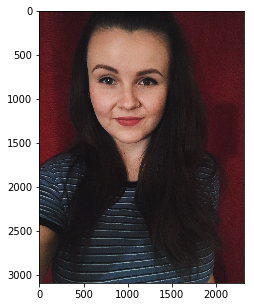

This looks like a human!
Here are the resembled breeds:

Chinese crested: 10.60%
Havanese: 4.89%
Afghan hound: 4.29%




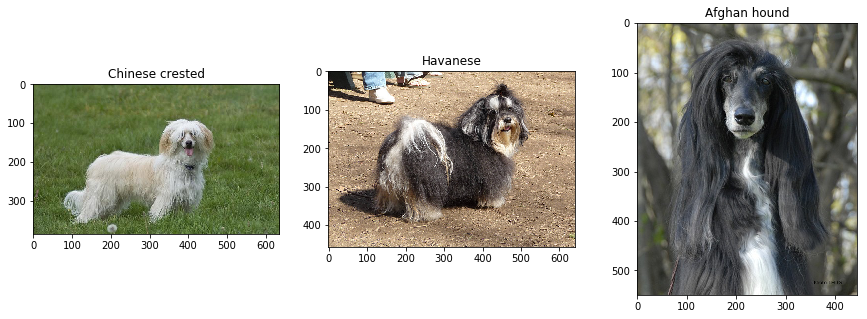



This is your image!


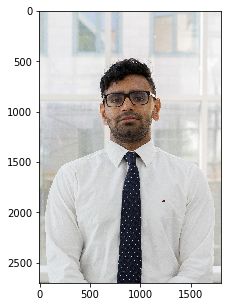

This looks like a human!
Here are the resembled breeds:

Pharaoh hound: 6.99%
Basenji: 5.92%
Ibizan hound: 5.08%




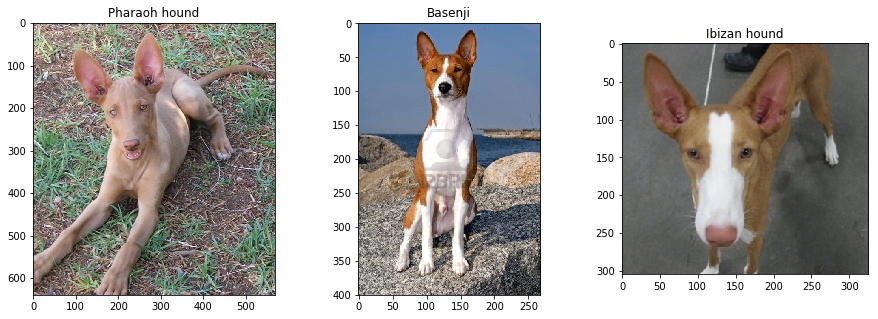



This is your image!


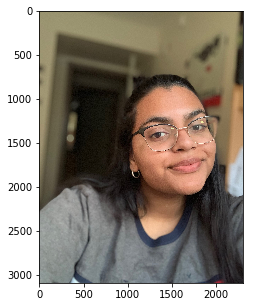

This looks like a human!
Here are the resembled breeds:

Afghan hound: 4.70%
Havanese: 4.28%
Bearded collie: 3.32%




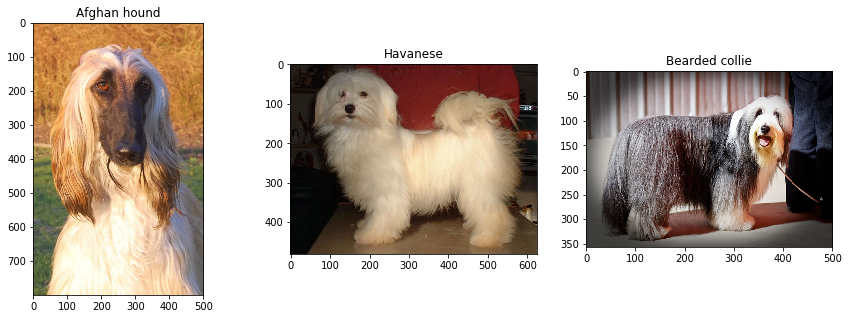



This is your image!


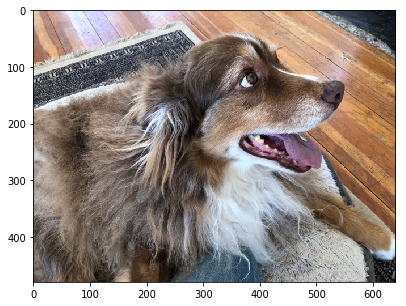

This looks like a dog!
Here are the predicted breeds:

Afghan hound: 45.89%
Border collie: 10.21%
Golden retriever: 8.57%




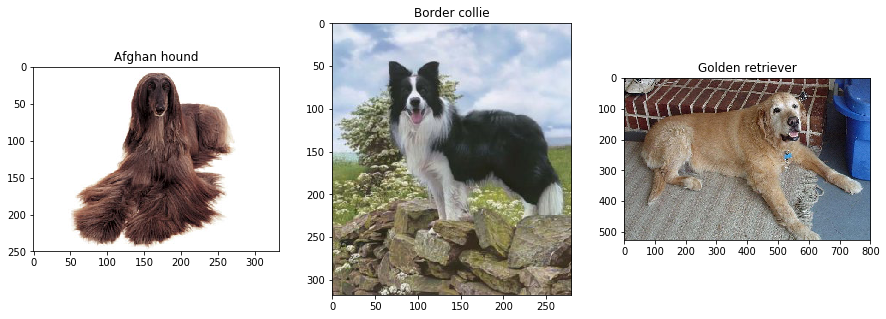



This is your image!


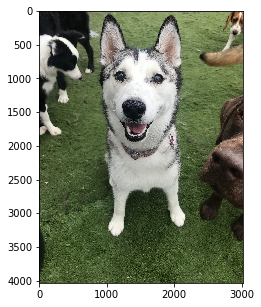

This looks like a dog!
Here are the predicted breeds:

Alaskan malamute: 52.46%
Cardigan welsh corgi: 23.95%
Border collie: 3.52%




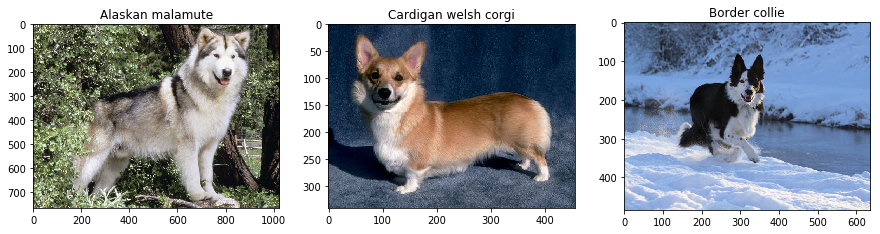



This is your image!


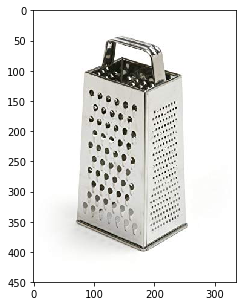

I don't think that's a dog or a human!




This is your image!


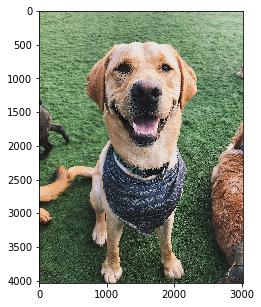

This looks like a dog!
Here are the predicted breeds:

Golden retriever: 82.25%
Labrador retriever: 7.48%
Chesapeake bay retriever: 2.09%




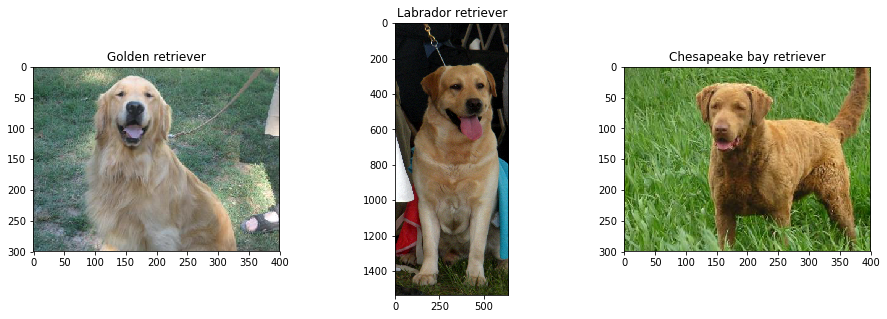

In [80]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
import numpy as np

model_transfer.eval()
## suggested code, below
for file in np.hstack((human_files_test[:], dog_files_test[:])):
    run_app(file)